In [1]:
import sys
sys.path.append('./')

from Analyzation_relative import Data_process as DP
from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Regression as Reg
from Analyzation_relative.Statistical_inference import Normality_test
from Analyzation_relative import Multivariate_statistical as MS

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

首先进行数据的读入

In [2]:
df1 = pd.read_csv("data/test/select_data.csv",encoding = "utf-8")
df2 = pd.read_csv('data/test/label_train.csv',index_col=0)
index = df2.index
pre_data = df1.loc[index , ].join(df2['MATH'])
pre_data = pre_data.drop(pre_data.columns[0] , axis=1)
pre_data = pre_data[['MATH']+list(pre_data.columns[0:-1].values)]
pre_data = pre_data.reset_index(drop=True)
pre_data

,MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV6READ,PV7READ,PV8READ,PV9READ,...,PV1SSES,PV2SSES,PV3SSES,PV4SSES,PV5SSES,PV6SSES,PV7SSES,PV8SSES,PV9SSES,PV10SSES
0,520.378,574,511,528,535,488,499,464,539,569,...,502,509,411,491,523,531,499,488,487,489
1,563.734,569,560,556,585,522,617,586,563,579,...,570,598,562,528,601,551,529,587,618,547
2,597.299,545,478,479,473,457,507,456,460,528,...,460,579,535,505,427,450,503,517,576,488
3,421.818,451,440,542,575,461,431,401,450,442,...,394,462,377,390,397,418,374,413,403,403
4,511.234,489,556,532,559,545,528,588,538,468,...,495,466,499,484,508,531,498,485,489,554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25699,396.169,476,486,478,415,397,459,387,418,489,...,317,338,333,443,415,407,355,380,354,339
25700,398.557,391,304,336,339,389,370,266,368,409,...,280,196,254,199,360,319,272,356,311,353
25701,396.373,384,329,378,308,306,338,377,326,376,...,393,353,345,335,397,327,318,343,382,317
25702,247.997,366,426,361,368,320,351,359,366,345,...,327,324,326,303,346,274,333,324,319,362


首先进行一次描述性统计，结果图位于PISA/descriptive_result/5_16_12_48，用于初步了解数据特征。

In [ ]:
DS.Auto_plt(pre_data , dataclass = DS.DataLabeling(pre_data) , filepath = './test/PISA/descriptive_result')

介于数据维数过高，模型极可能效果不佳，故而使用一次主成分。

其中可以从方差累计贡献率图看到，数据的共线性以及PCA效果良好，截取前17个主成分变量即可包含90%的方差贡献率，囊括大多数原始信息。

,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
0,-4828.711851,-249.150252,90.506818,-54.970449,-69.041591,51.407273,-19.906345,-6.756234,-18.128348,-21.419514,24.275119,3.955672,22.127981,56.322136,-16.523055,36.304534,64.999683
1,-5721.063184,-155.966611,51.728433,5.232680,18.301432,48.539133,-3.812044,-32.371234,-0.826240,-48.139528,7.950343,-29.598127,32.520183,3.267120,58.859428,-22.891500,19.333309
2,-4859.918913,-89.367854,119.049477,60.570695,-3.461622,-20.309164,-11.868767,-3.763011,-189.593479,109.336825,3.649676,-82.967586,-18.537827,29.387884,39.273078,-58.023150,40.274366
3,-4019.810686,-230.406267,243.044098,67.755407,11.522524,-7.265658,-17.137975,12.823453,2.984673,-40.519714,-15.825604,-39.074273,50.678360,20.206639,20.663753,-54.991877,12.798489
4,-4963.038337,-274.713842,51.701052,42.389264,-36.515821,-19.816970,-21.445815,12.063084,5.393332,30.677672,24.100325,-12.996511,0.991931,46.415218,3.144273,18.572126,-17.006346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25699,-3879.039345,-261.642781,61.992712,62.344884,-46.192465,74.948980,18.390963,-11.892671,65.398448,35.504251,28.989388,26.102018,-74.315862,-21.892094,19.050215,16.914609,-17.485074
25700,-3374.443620,-169.220375,-54.333822,141.087855,-66.318601,-153.142905,-9.139651,-50.691310,158.422728,-29.414172,-39.655234,46.116648,73.094931,-113.638717,33.372454,-24.642633,-84.755060
25701,-3541.061054,-86.289291,12.620980,39.013687,78.011683,50.984087,-30.792444,-48.284335,-32.640389,8.338266,-6.866259,-50.384645,34.235551,84.621037,-2.702967,61.387331,-26.908965
25702,-3184.494479,-252.229911,27.187344,-29.839950,-42.877470,13.395983,-13.236750,36.120736,-9.550503,66.330957,14.472535,53.620983,-42.105931,-33.007134,38.386784,-88.329235,5.978617


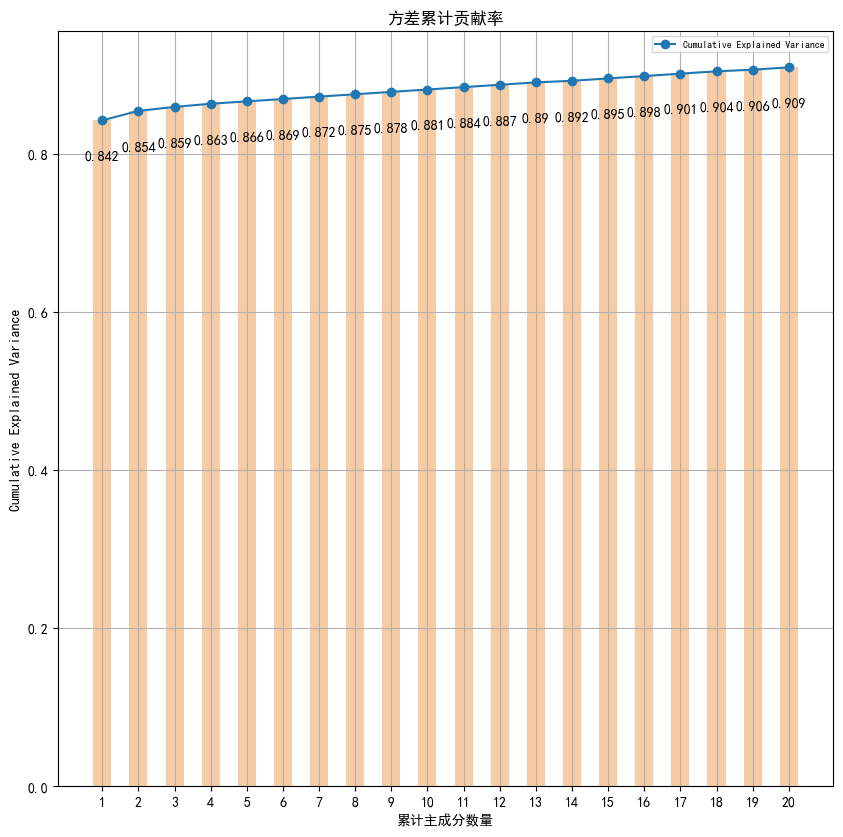

In [3]:

fig , axes = plt.subplots(figsize = (10 , 10) , dpi = 100)
eigin  , PCA_data= MS.PCA(pre_data.iloc[: , 1:] , use_cor = False , ax = axes , percentage=0.9)
PCA_data
#plt.show()

随后进行主成分后的描述性统计

文件路径为PISA/descriptive_result/5_16_13_7

从结果的heatmap当中可以看到

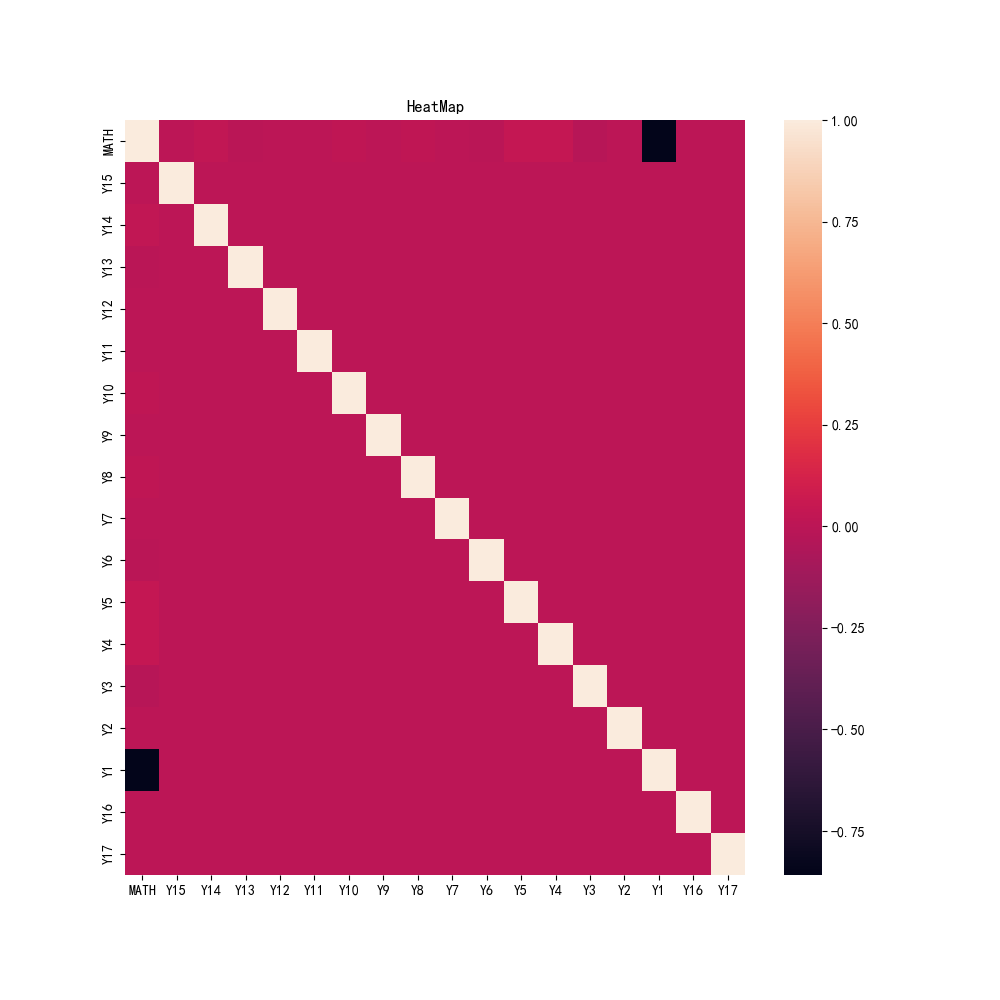

明显说明MATH和第一主成分Y1出现了较强的相关性，可以考虑进行线性模型的拟合。

In [ ]:
df_pro = pre_data.loc[: , ['MATH']].join(PCA_data)
DS.Auto_plt(df_pro , dataclass = DS.DataLabeling(df_pro) , filepath = './test/PISA/descriptive_result')

因为jupyter无法进行多线程，所以先进行文件的导出

In [5]:
df_pro.to_csv('./data/test/PISA-processed.csv')

随后在.py文件中运行如下代码：
```python
new_df = pd.read_csv('./data/test/PISA-processed.csv' , index_col = 0)
mode , Xlist , args_list , result_list = Automatic_reg(new_df , dataclass = None ,target_col = 'MATH' ,  mode = None, filepath = './test/PISA')
```

得到的结果位于Automatic_reg.result/5_16_13_44当中

终端给出的信息为：

UserWarning: There is no binary variable in X , ignored this mode : dummy and linear

UserWarning: There is no binary variable in X , ignored this mode : dummy and polynomial


可以看到，同白葡萄酒示例一样，正确识别了参数中并不存在二分变量，程式具有较强的鲁棒性。
同时，从结果来看，线性模型的调整的 $R^2$ 为0.7411，而多项式模型的调整的$R^2$为0.7411，   
且第一主成分在spearman秩相关test以及Goldfeld-Quandt test当中，均是引起异方差的显著变量。
至此，基本说明PCA在模型解释性上无法贡献多少，需要进一步引入其他的方法和更进阶的模型解释问题。